In [99]:

from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as stats

import pymongo 
import pandas as pd
import config


In [2]:
# Connect with the portnumber and host  
client = pymongo.MongoClient(config.mongo_conn)  
    
# Access database  
cl_db = client['craigslist_db']  
    
# Access collection of the database  
cl_collection = cl_db['listings']  

In [3]:
# cusor with listing_date
# #cursor = cl_collection.find({},{ 'data_id': 1, 'listing_price': 1, 'listing_addrlocality': 1,'listing_addrzip': 1,'listing_bedbath': 1,'listing_type': 1, 'listing_datetime': 1,'listing_sqft': 1, '_id': 0 })   

cursor = cl_collection.find({},{ 'data_id': 1, 'listing_price': 1, 'listing_addrlocality': 1,'listing_addrzip': 1,'listing_bedbath': 1,'listing_type': 1,'listing_sqft': 1, '_id': 0 })   

list_cur = list(cursor)
df = pd.DataFrame(list_cur)
df.head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668


In [4]:
df.count()

data_id                 9295
listing_price           9295
listing_addrlocality    8989
listing_addrzip         8989
listing_bedbath         8989
listing_type            8989
listing_sqft            9295
dtype: int64

In [5]:
df.dropna()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
9064,7281497359,700,San Ysidro,92173,3BR / 2Ba,House,0
9065,7281495651,15000,Imperial Beach,91932,2BR / 1Ba,Apartment,0
9066,7281496781,1500,Imperial Beach,91932,4BR / 3Ba,House,0
9067,7281495157,850,San Diego,92154,2BR / 1.5Ba,House,0


In [59]:
def Average(lst): 
    return sum(lst) / len(lst) 
  
# Driver Code 
lst = [15, 9, 55, 41, 35, 20, 62, 49] 
average = Average(lst) 

blank_listing_sqft_df = df.loc[df['listing_sqft'] < 50]
data_ids_blank_sqft = blank_listing_sqft_df['data_id']

# loop through blank sqft ids (drop blank sqft ids)
for data_id in data_ids_blank_sqft:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

blank_zip_sqft_df = df.loc[df['listing_addrzip'] == '']
data_ids_blank_zip = blank_zip_sqft_df['data_id']

# loop through blank zip (drop blank zip ids)
for data_id in data_ids_blank_zip:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)


outlier_listing_sqft_df = df.loc[(df['listing_sqft'] >= 199900) & (df['listing_bedbath'] == '2BR / 1Ba')]
data_ids_outlier_sqft = outlier_listing_sqft_df['data_id']

# loop through blank sqft ids (drop blank sqft ids)
for data_id in data_ids_outlier_sqft:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

outlier_price_df = df.loc[df['listing_price'] < 300]
outlier_price_ids = outlier_price_df['data_id']

# loop through zero price ids (drop zero price ids)
for data_id in outlier_price_ids:
    df.drop(df.index[df['data_id'] == data_id], inplace = True)

print(len(outlier_price_ids))

df.dropna()

0


,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
9049,7281626371,2100,San Diego,92115,2BR / 2Ba,Apartment,954
9052,7281620514,1545,Chula Vista,91909,1BR / 1Ba,Apartment,700
9053,7281619617,1825,Chula Vista,91909,2BR / 2Ba,Apartment,1000
9054,7281618679,1795,Chula Vista,91909,2BR / 2Ba,Apartment,900


In [8]:
clean_df = df.dropna()

In [9]:
clean_df.sort_values(by=['listing_price'], ascending=True).head(5)

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
3700,7278094458,475,El Cajon,92022,1BR / 1Ba,Apartment,250
3701,7273402160,475,El Cajon,92022,1BR / 1Ba,Apartment,250
3702,7273400891,475,El Cajon,92022,1BR / 1Ba,Apartment,250
8395,7281458635,500,Tecate,91987,2BR / 1Ba,Apartment,3230
918,7274493738,544,Escondido,92033,2BR / 1Ba,Apartment,650


In [58]:
clean_df.sort_values(by=['listing_price'], ascending=False).head(5)

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
1740,7278890292,30000,Rancho Santa Fe,92091,8BR / 9+Ba,Apartment,11325
284,7278891048,30000,Rancho Santa Fe,92091,8BR / 9+Ba,Apartment,11325
800,7280169186,23275,Carlsbad,92018,2BR / 2Ba,Apartment,900
281,7278890580,18500,Solana Beach,92075,4BR / 4.5Ba,House,4482
283,7278890472,18000,La Jolla,92093,6BR / 6.5Ba,House,4900


In [10]:
clean_df.sort_values(by=['listing_sqft'], ascending=False).head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
284,7278891048,30000,Rancho Santa Fe,92091,8BR / 9+Ba,Apartment,11325
1740,7278890292,30000,Rancho Santa Fe,92091,8BR / 9+Ba,Apartment,11325
3621,7278316425,1900,El Cajon,92020,2BR / 2Ba,Apartment,8964
5348,7280149658,16000,Poway,92074,6BR / 7Ba,House,6790
813,7280151435,8500,La Mesa,91941,6BR / 7Ba,House,6100


In [11]:
clean_df.sort_values(by=['listing_sqft'], ascending=True).head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
6555,7279410716,1795,San Diego,92112,0BR / 1Ba,House,63
6885,7275672817,1050,San Ysidro,92173,0BR / 1Ba,Apartment,180
4316,7280726073,1275,San Diego,92116,1BR / 1Ba,Apartment,200
5005,7278278426,1545,San Diego,92187,0BR / 1Ba,Apartment,202
6102,7279743779,1545,San Diego,92187,0BR / 1Ba,Apartment,202


In [12]:
clean_df.dtypes 

data_id                 object
listing_price            int64
listing_addrlocality    object
listing_addrzip         object
listing_bedbath         object
listing_type            object
listing_sqft             int64
dtype: object

In [14]:
grouped_zip_df = clean_df.groupby(["listing_addrzip"])
grouped_zip_df.head()

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
7806,7278023310,6000,San Diego,92155,4BR / 3Ba,House,2000
8228,7281098400,2850,El Cajon,92019,3BR / 3Ba,House,1600
8238,7276478747,2895,San Diego,92114,3BR / 2.5Ba,House,1800
8268,7281431428,2700,La Jolla,92092,1BR / 1Ba,Apartment,550


In [83]:
# mean, median, variance, standard deviation, and SEM of the listing_price 
mean_listing_price = grouped_zip_df["listing_price"].mean()
zip_count = grouped_zip_df["listing_addrzip"].count()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Average List Price": mean_listing_price,
    "Listing Count": zip_count,
    "Location": grouped_zip_df["listing_addrlocality"].unique(),
    "Zip Code": grouped_zip_df["listing_addrzip"].unique(),
    "Location (Zip)": grouped_zip_df["listing_addrlocality"].unique() + " " + grouped_zip_df["listing_addrzip"].unique()
    })
summary_stats_df

,Average List Price,Listing Count,Location,Zip Code,Location (Zip)
listing_addrzip,,,,,
20011,1835.000000,1,[Washington],[20011],[Washington 20011]
67340,4150.000000,2,[Dearing],[67340],[Dearing 67340]
89173,1126.500000,2,[Las Vegas],[89173],[Las Vegas 89173]
91901,1450.000000,1,[Alpine],[91901],[Alpine 91901]
91902,2061.807692,26,[Bonita],[91902],[Bonita 91902]
...,...,...,...,...,...
92198,2392.312500,16,[San Diego],[92198],[San Diego 92198]
92199,2303.280000,25,[San Diego],[92199],[San Diego 92199]
92531,2400.000000,1,[Lake Elsinore],[92531],[Lake Elsinore 92531]


In [85]:
summary_stats_highpricezips_df = summary_stats_df.sort_values(by=['Average List Price'], ascending=False).head(20)
summary_stats_lowpricezips_df = summary_stats_df.sort_values(by=['Average List Price'], ascending=True).head(20)
summary_stats_mostlistingszips_df = summary_stats_df.sort_values(by=['Listing Count'], ascending=False).head(20)


In [17]:
summary_stats_highpricezips_df

,Average List Price,Location,Zip Code,Location (Zip)
listing_addrzip,,,,
92091,21200.000000,[Rancho Santa Fe],[92091],[Rancho Santa Fe 92091]
92155,6000.000000,[San Diego],[92155],[San Diego 92155]
67340,4150.000000,[Dearing],[67340],[Dearing 67340]
92075,3749.285714,[Solana Beach],[92075],[Solana Beach 92075]
92093,3641.642857,[La Jolla],[92093],[La Jolla 92093]
92029,3500.833333,[Escondido],[92029],[Escondido 92029]
92003,3250.000000,[Bonsall],[92003],[Bonsall 92003]
92130,3040.115385,[San Diego],[92130],[San Diego 92130]
92014,2970.391892,[Del Mar],[92014],[Del Mar 92014]


In [18]:
summary_stats_lowpricezips_df

,Average List Price,Location,Zip Code,Location (Zip)
listing_addrzip,,,,
91987,500.000000,[Tecate],[91987],[Tecate 91987]
91905,557.000000,[Boulevard],[91905],[Boulevard 91905]
89173,1126.500000,[Las Vegas],[89173],[Las Vegas 89173]
92036,1156.250000,[Julian],[92036],[Julian 92036]
91935,1375.000000,[Jamul],[91935],[Jamul 91935]
91908,1439.500000,[Bonita],[91908],[Bonita 91908]
91901,1450.000000,[Alpine],[91901],[Alpine 91901]
92030,1477.372881,[Escondido],[92030],[Escondido 92030]
92106,1485.000000,[San Diego],[92106],[San Diego 92106]


In [86]:
summary_stats_mostlistingszips_df

,Average List Price,Listing Count,Location,Zip Code,Location (Zip)
listing_addrzip,,,,,
92033,1823.873589,443,[Escondido],[92033],[Escondido 92033]
92122,2390.032727,275,[San Diego],[92122],[San Diego 92122]
92187,2458.776423,246,[San Diego],[92187],[San Diego 92187]
92085,1953.013333,225,[Vista],[92085],[Vista 92085]
92079,2231.924171,211,[San Marcos],[92079],[San Marcos 92079]
92054,1993.464115,209,[Oceanside],[92054],[Oceanside 92054]
91911,2078.820513,195,[Chula Vista],[91911],[Chula Vista 91911]
91909,1751.908046,174,[Chula Vista],[91909],[Chula Vista 91909]
92056,2032.567073,164,[Oceanside],[92056],[Oceanside 92056]


In [19]:
mean_highprices = []
locations_highprices = []
zipcodes_highprices = []

for m in summary_stats_highpricezips_df['Average List Price']:
    mean_highprices.append(m)
for l in summary_stats_highpricezips_df['Location (Zip)']:
    locations_highprices.append(l)        
for z in summary_stats_highpricezips_df['Zip Code']:
    zipcodes_highprices.append(z)        



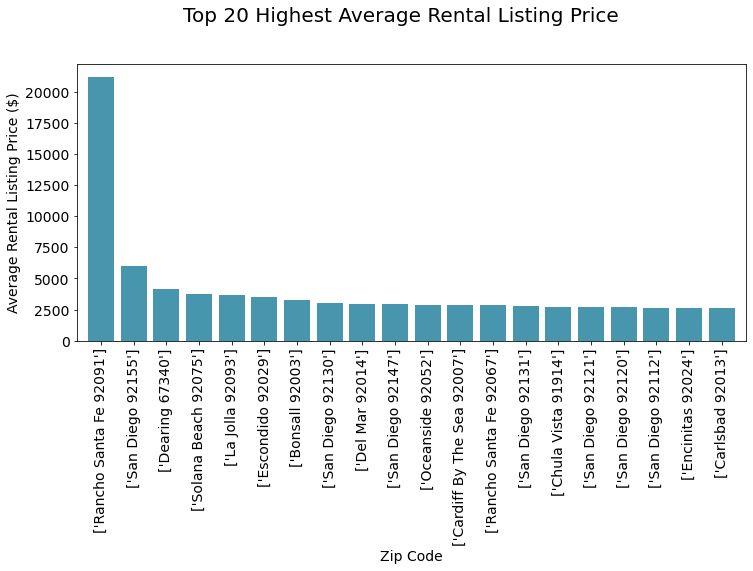

In [61]:
x_axis = np.arange(0, len(locations_highprices))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig, ax = plt.subplots(figsize=(12,8)) # set the size that you'd like 
fig.subplots_adjust(bottom=0.4)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
fig.suptitle('Top 20 Highest Average Rental Listing Price', fontsize=20)

plt.xlabel("Zip Code")
plt.ylabel("Average Rental Listing Price ($)")

plt.xlim(-0.75, len(locations_highprices)-.25)
plt.ylim(0, max(mean_highprices) + 1000)

plt.bar(x_axis,mean_highprices, facecolor="#097392", alpha=0.75, align="center")
plt.xticks(tick_locations, locations_highprices, rotation=90)
plt.savefig("../resources/images/fig01_top20averageprice.png")
plt.show()


In [24]:
mean_lowprices = []
locations_lowprices = []
zipcodes_lowprices = []

for m in summary_stats_lowpricezips_df['Average List Price']:
    mean_lowprices.append(m)
for l in summary_stats_lowpricezips_df['Location (Zip)']:
    locations_lowprices.append(l)        
for z in summary_stats_lowpricezips_df['Zip Code']:
    zipcodes_lowprices.append(z)      

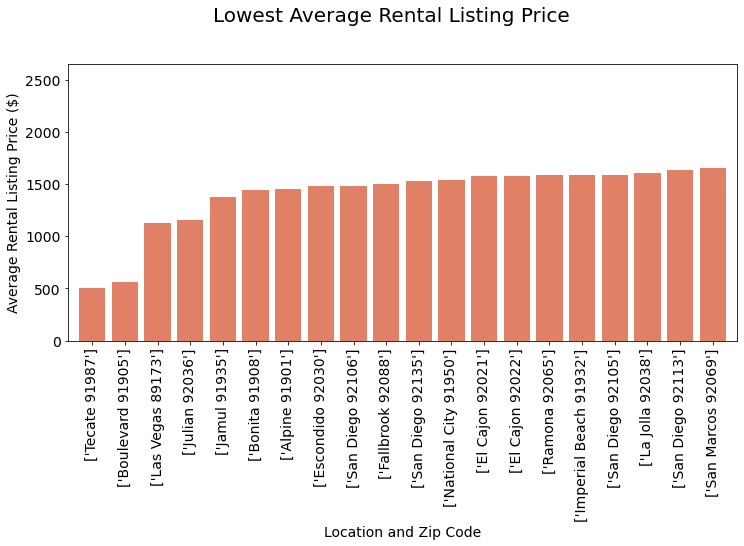

In [79]:
x_axis = np.arange(0, len(locations_lowprices))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)
    
fig, ax = plt.subplots(figsize=(12,8)) # set the size that you'd like 
fig.subplots_adjust(bottom=0.4)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(14)
fig.suptitle('Lowest Average Rental Listing Price', fontsize=20)

plt.xlabel("Location and Zip Code")
plt.ylabel("Average Rental Listing Price ($)")

plt.xlim(-0.75, len(locations_lowprices)-.25)
plt.ylim(0, max(mean_lowprices) + 1000)

plt.bar(x_axis, mean_lowprices, facecolor=config.orangered, alpha=0.75, align="center")
plt.xticks(tick_locations, locations_lowprices, rotation=90)
plt.savefig("../resources/images/fig02_bottom20averageprice.png")
plt.show()


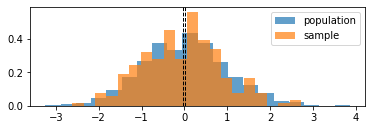

In [66]:

"""
# Histogram Plot of Data
plt.subplot(2, 1, 2)
plt.hist(population, 20, density=True, alpha=0.7, label="population")
plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
plt.legend()  
"""

In [107]:
listprices = []

for lp in clean_df['listing_price']: 
    listprices.append(lp)

print(f'Total number of list prices analyzed: {len(listprices)}')  
print(f'Average listing price accross all zip codes: ${round(Average(listprices),0)}')  
print(f'Highest list price all zip codes ${max(listprices)}')
print(f'Lowest list price all zip codes ${min(listprices)}')

Total number of list prices analyzed: 6596
Average listing price accross all zip codes: $2171.0
Highest list price all zip codes $30000
Lowest list price all zip codes $475


<function matplotlib.pyplot.show(close=None, block=None)>

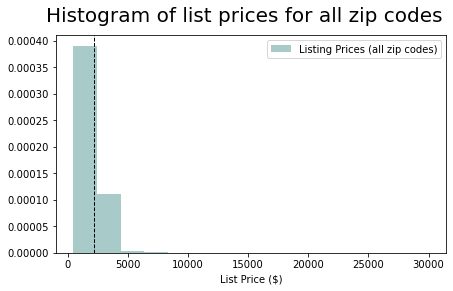

In [111]:
# Histogram Plot of Data
fig, ax = plt.subplots(figsize=(7,4)) # set the size that you'd like 
fig.suptitle('Histogram of list prices for all zip codes', fontsize=20)
plt.xlabel("List Price ($)")

plt.subplot(1,1,1)
plt.hist(listprices, 15, density=True, alpha=0.7,color=config.lightgreen, label="Listing Prices (all zip codes)")
plt.axvline(Average(listprices), color='k', linestyle='dashed', linewidth=1)
plt.savefig("../resources/images/fig05_listinghistallzips.png")
plt.legend() 



plt.show


In [43]:
clean_df

,data_id,listing_price,listing_addrlocality,listing_addrzip,listing_bedbath,listing_type,listing_sqft
0,7278244211,2095,Carlsbad,92009,1BR / 1Ba,Apartment,679
1,7280806990,2920,San Diego,92121,2BR / 2Ba,Apartment,1098
2,7278515816,1575,Escondido,92033,2BR / 2Ba,Apartment,948
3,7277910674,2030,San Marcos,92079,1BR / 1Ba,Apartment,829
4,7279719841,1437,Escondido,92033,1BR / 1Ba,Apartment,668
...,...,...,...,...,...,...,...
9049,7281626371,2100,San Diego,92115,2BR / 2Ba,Apartment,954
9052,7281620514,1545,Chula Vista,91909,1BR / 1Ba,Apartment,700
9053,7281619617,1825,Chula Vista,91909,2BR / 2Ba,Apartment,1000
9054,7281618679,1795,Chula Vista,91909,2BR / 2Ba,Apartment,900


In [81]:
# mean, median, variance, standard deviation, and SEM of the listing_price 
zip_count = grouped_zip_df["listing_addrzip"].count()

# Assemble the resulting series into a single summary dataframe.

summary_stats_df = pd.DataFrame(
    {"Zip Listing Count": zip_count,
    "Location": grouped_zip_df["listing_addrlocality"].unique(),
    "Zip Code": grouped_zip_df["listing_addrzip"].unique(),
    "Location (Zip)": grouped_zip_df["listing_addrlocality"].unique() + " " + grouped_zip_df["listing_addrzip"].unique()
    })
summary_stats_df

,Zip Listing Count,Location,Zip Code,Location (Zip)
listing_addrzip,,,,
20011,1,[Washington],[20011],[Washington 20011]
67340,2,[Dearing],[67340],[Dearing 67340]
89173,2,[Las Vegas],[89173],[Las Vegas 89173]
91901,1,[Alpine],[91901],[Alpine 91901]
91902,26,[Bonita],[91902],[Bonita 91902]
...,...,...,...,...
92198,16,[San Diego],[92198],[San Diego 92198]
92199,25,[San Diego],[92199],[San Diego 92199]
92531,1,[Lake Elsinore],[92531],[Lake Elsinore 92531]


In [106]:

listing_92033_df = clean_df.loc[clean_df['listing_addrzip'] == '92033']
listing_92033_prices = listing_92033_df['listing_price']

len(listing_92033_prices)
print(f'Total number of list prices in 92033 (Encinitas): {len(listing_92033_prices)}')  
print(f'Average listing price accross 92033 (Encinitas): ${round(Average(listing_92033_prices),0)}')  
print(f'Highest list price in 92033 (Encinitas) ${max(listing_92033_prices)}')
print(f'Lowest list price in 92033 (Encinitas) ${min(listing_92033_prices)}')

Total number of list prices in 92033 (Encinitas): 443
Average listing price accross 92033 (Encinitas): $1824.0
Highest list price in 92033 (Encinitas) $15000
Lowest list price in 92033 (Encinitas) $544


<function matplotlib.pyplot.show(close=None, block=None)>

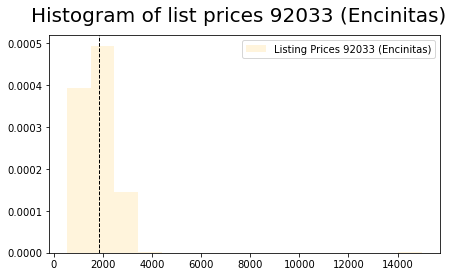

In [112]:
# Histogram Plot of Data
fig, ax = plt.subplots(figsize=(7,4)) # set the size that you'd like 
fig.suptitle('Histogram of list prices 92033 (Encinitas)', fontsize=20)
plt.xlabel("List Price ($)")

plt.subplot(1,1,1)
plt.hist(listing_92033_prices, 15, density=True, alpha=0.7,color=config.lightyellow, label="Listing Prices 92033 (Encinitas)")
plt.axvline(Average(listing_92033_prices), color='k', linestyle='dashed', linewidth=1)
plt.savefig("../resources/images/fig07_listinghist92033zip.png")
plt.legend()  
plt.show
